In [1]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [7]:
dataset = pd.read_csv('Dataset_Dec.csv')

In [8]:
dataset.head()

,Area,Year,Item,Area Harvested,Yield,Production
0,Bangladesh,1961,Areca nuts,82600,7627,62995
1,Bangladesh,1961,Bananas,33600,132738,446000
2,Bangladesh,1961,Barley,29947,5768,17272
3,Bangladesh,1961,"Bastfibres, others",30900,11117,34350
4,Bangladesh,1961,"Beans, dry",68798,7236,49784


In [9]:
# df['Item'].value_counts()
dataset['Item'].nunique()

54

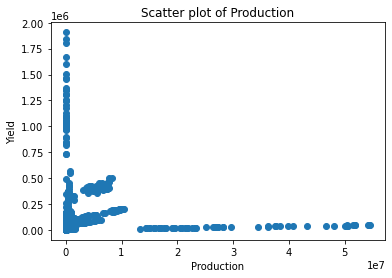

In [10]:
plt.scatter(dataset['Production'],dataset['Yield'], alpha=1)
plt.title('Scatter plot of Production')
plt.xlabel('Production')
plt.ylabel('Yield')
plt.show()

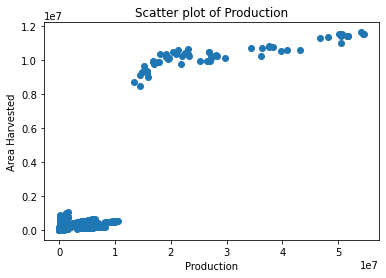

In [11]:
plt.scatter(dataset['Production'],dataset['Area Harvested'], alpha=1)
plt.title('Scatter plot of Production')
plt.xlabel('Production')
plt.ylabel('Area Harvested')
plt.show()

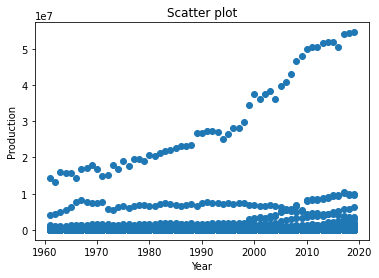

In [17]:
plt.scatter(dataset['Year'],dataset['Production'], alpha=1)
plt.title('Scatter plot')
plt.xlabel('Year')
plt.ylabel('Production')
plt.show()

## OneHotEncoding using sklearn

In [18]:
from sklearn.model_selection import train_test_split
# first 5 cols as train as input, last col as output
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,0:5],df.iloc[:,-1],test_size=0.2,random_state=2)

In [19]:
X_test.head()

,Area,Year,Item,Area Harvested,Yield
3064,Bangladesh,2017,Spices nes,47332,35494
761,Bangladesh,1975,"Beans, green",6632,39704
2692,Bangladesh,2010,Tea,52236,11486
2940,Bangladesh,2015,Linseed,7009,6941
1901,Bangladesh,1996,Coconuts,29200,30479


In [20]:
X_train.head()

,Area,Year,Item,Area Harvested,Yield
2560,Bangladesh,2008,Lentils,72581,9856
2720,Bangladesh,2011,Jute,708723,21494
1346,Bangladesh,1985,"Vegetables, fresh nes",77023,62181
148,Bangladesh,1963,Sorghum,809,12559
2473,Bangladesh,2006,Sugar crops nes,20234,191756


In [22]:
from sklearn.preprocessing import OneHotEncoder

In [23]:
# object
# multicollinearity removal
# removing the catagories from the columns with drop first
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)

In [24]:
X_train_new = ohe.fit_transform(X_train[['Area','Item']])
# we get the no. of cols depending on the categories
X_train_new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
X_test_new = ohe.transform(X_test[['Area','Item']])

In [26]:
X_test_new

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [27]:
# now to append everything together
data = np.hstack((X_train[['Year','Area Harvested','Yield']].values,X_train_new))
data

array([[    2008,    72581,     9856, ...,        0,        0,        0],
       [    2011,   708723,    21494, ...,        0,        0,        0],
       [    1985,    77023,    62181, ...,        0,        1,        0],
       ...,
       [    1990,     4014,    45279, ...,        0,        0,        0],
       [    2008,    46482,     8547, ...,        0,        0,        0],
       [    2008, 11279150,    41441, ...,        0,        0,        0]],
      dtype=int64)

In [30]:
data.shape

(2548, 56)